In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from mll_calc.mll_pred import ratios

In [4]:
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
tamu_list = ['cs137/cs133', 'cs134/cs137', 'cs135/cs137', 'ba136/ba138',
             'sm150/sm149', 'sm152/sm149', 'eu154/eu153', 'pu240/pu239',
             'pu241/pu239', 'pu242/pu239']

In [5]:
# initial DB of test samples including nuclide vectors
sfco_pkl = '~/sfcompo/format_clean/sfcompo_formatted.pkl'
sfco = pd.read_pickle(sfco_pkl)

# ratios for initial DB
sfcoDB = ratios(sfco, tamu_list, lbls)

# get non-zero ratio counts for each DB entry
sfcoDB['> zero'] = sfcoDB[sfcoDB.columns[~sfcoDB.columns.isin(lbls)]].gt(0).sum(axis=1)

# results DBs with LogLikelihoods and predictions
sfco_path = '~/sims_n_results/nucmoles_opusupdate_aug2019/sfco/'
uncs = [0.05, 0.1, 0.15, 0.2]
job_dirs = ['Job' + str(i) + '_unc' + str(unc) for i, unc in enumerate(uncs)]
sfcoLL = {}
for i, unc_job in enumerate(job_dirs):
    sfcoLL[str(i)] = pd.read_csv(sfco_path + unc_job + '/' + unc_job + '.csv')

# calc relative error
for unc_df in list(sfcoLL.keys()):
    df = sfcoLL[unc_df]
    df['Percent_Burnup_Error'] = df['Burnup_Error'] / df['Burnup']

In [16]:
sfco_keep = ['sim_idx', #'Burnup', 'CoolingTime', 'Enrichment', 'OrigenReactor', 'ReactorType', 
             'pred_idx', 'pred_ReactorType', 'pred_CoolingTime', 'pred_Enrichment', 
             'pred_Burnup', 'pred_OrigenReactor', 'MaxLogLL', 'MaxLLUnc', '2ndMaxLogLL', '2ndMaxLLUnc', 
             'ReactorType_Score', 'CoolingTime_Error', 'Enrichment_Error', 'Burnup_Error', 
             'OrigenReactor_Score', 'Percent_Burnup_Error']

In [17]:
df = pd.merge(sfcoDB, sfcoLL['0'][sfco_keep], how='left', left_index=True, right_on='sim_idx')
df.columns
#sfco.columns

Index(['cs137/cs133', 'cs134/cs137', 'cs135/cs137', 'ba136/ba138',
       'sm150/sm149', 'sm152/sm149', 'eu154/eu153', 'pu240/pu239',
       'pu241/pu239', 'pu242/pu239', 'ReactorType', 'CoolingTime',
       'Enrichment', 'Burnup', 'OrigenReactor', '> zero', 'sim_idx',
       'pred_idx', 'pred_ReactorType', 'pred_CoolingTime', 'pred_Enrichment',
       'pred_Burnup', 'pred_OrigenReactor', 'MaxLogLL', 'MaxLLUnc',
       '2ndMaxLogLL', '2ndMaxLLUnc', 'ReactorType_Score', 'CoolingTime_Error',
       'Enrichment_Error', 'Burnup_Error', 'OrigenReactor_Score',
       'Percent_Burnup_Error'],
      dtype='object')

In [8]:
rat_dfs = {}
for n in np.arange(3, 10):
    rat_dfs['rat' + str(n)] = df.loc[df['> zero'] == n]

In [30]:
to_print = ['ReactorType', 'Enrichment', 'Burnup', 'OrigenReactor', '> zero', 'sim_idx',
            'pred_idx', 'pred_ReactorType', 'pred_Enrichment', 'pred_Burnup', 
            'ReactorType_Score', 'Enrichment_Error', 'Percent_Burnup_Error']
rat_dfs['rat9'][to_print].sort_values(['Enrichment_Error', 'Percent_Burnup_Error'])

,ReactorType,Enrichment,Burnup,OrigenReactor,> zero,sim_idx,pred_idx,pred_ReactorType,pred_Enrichment,pred_Burnup,ReactorType_Score,Enrichment_Error,Percent_Burnup_Error
178,pwr,4.370,57600.0,Kola-3_VVER-440,9,KOL-3|144-46879|61|189,21066,bwr,4.36,32903.66,False,0.010,0.428756
232,pwr,3.592,22860.0,Novovoronezh-4_VVER-440,9,NOV-4|13626135|65|182,19546,bwr,3.67,17297.35,False,0.078,0.243336
234,pwr,3.592,29900.0,Novovoronezh-4_VVER-440,9,NOV-4|13626135|69|135,16414,bwr,3.29,20466.64,False,0.302,0.315497
239,pwr,3.592,36200.0,Novovoronezh-4_VVER-440,9,NOV-4|13626135|69|57,16432,bwr,3.29,24444.83,False,0.302,0.324728
177,pwr,4.380,51200.0,Kola-3_VVER-440,9,KOL-3|144-46879|96|63,13758,bwr,4.01,27630.85,False,0.370,0.460335
175,pwr,4.370,42300.0,Kola-3_VVER-440,9,KOL-3|144-46879|61|76,15207,bwr,3.97,22012.47,False,0.400,0.479611
173,pwr,4.380,40800.0,Kola-3_VVER-440,9,KOL-3|144-46879|62|165,15207,bwr,3.97,22012.47,False,0.410,0.460479
457,pwr,4.500,43520.0,Vandellos-2_PWR,9,VAN-2|EF05|WZR0058|E58-88,16674,bwr,4.05,24444.83,False,0.450,0.438308
235,pwr,3.592,31320.0,Novovoronezh-4_VVER-440,9,NOV-4|13626135|65|69,16657,bwr,4.05,20466.64,False,0.458,0.346531
179,pwr,4.380,58300.0,Kola-3_VVER-440,9,KOL-3|144-46879|96|98,14037,bwr,4.99,36727.11,False,0.610,0.370032


## Boxplot for Relative Burnup Error

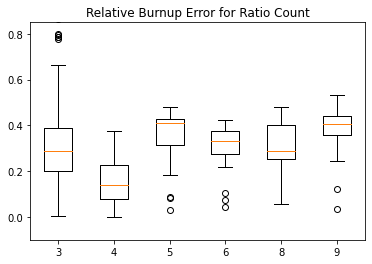

In [19]:
data = [rat_dfs['rat3']['Percent_Burnup_Error'],
        rat_dfs['rat4']['Percent_Burnup_Error'],
        rat_dfs['rat5']['Percent_Burnup_Error'],
        rat_dfs['rat6']['Percent_Burnup_Error'],
        rat_dfs['rat8']['Percent_Burnup_Error'],
        rat_dfs['rat9']['Percent_Burnup_Error']
       ]
fig, ax = plt.subplots()
ax.set_title('Relative Burnup Error for Ratio Count')
ax.boxplot(data, labels=[3, 4, 5, 6, 8, 9])
ax.set_ylim(-0.1, 0.85)
plt.show()

## Boxplot for Max LL

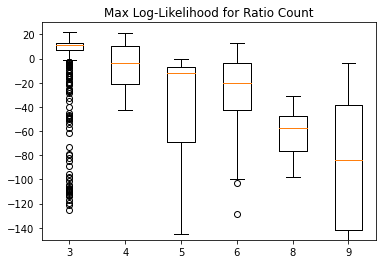

In [20]:
data = [rat_dfs['rat3']['MaxLogLL'],
        rat_dfs['rat4']['MaxLogLL'],
        rat_dfs['rat5']['MaxLogLL'],
        rat_dfs['rat6']['MaxLogLL'],
        rat_dfs['rat8']['MaxLogLL'],
        rat_dfs['rat9']['MaxLogLL']
       ]
fig, ax = plt.subplots()
ax.set_title('Max Log-Likelihood for Ratio Count')
ax.boxplot(data, labels=[3, 4, 5, 6, 8, 9])
ax.set_ylim(-150, 30)
plt.show()

## Burnup Error Boxplots split by reactor type

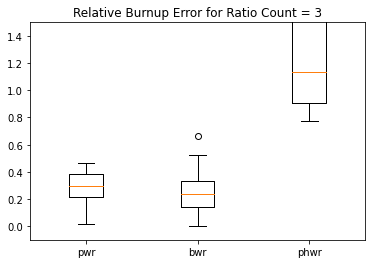

In [21]:
rat3 = rat_dfs['rat3']
data = [rat3['Percent_Burnup_Error'].loc[rat3['ReactorType']=='pwr'],
        rat3['Percent_Burnup_Error'].loc[rat3['ReactorType']=='bwr'], 
        rat3['Percent_Burnup_Error'].loc[rat3['ReactorType']=='phwr']
       ]
fig, ax = plt.subplots()
ax.set_title('Relative Burnup Error for Ratio Count = 3')
ax.boxplot(data, labels=['pwr', 'bwr', 'phwr'])
ax.set_ylim(-0.1, 1.5)
plt.show()

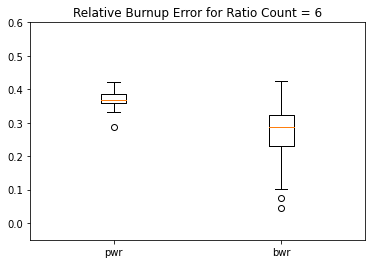

In [22]:
rat6 = rat_dfs['rat6']
data = [rat6['Percent_Burnup_Error'].loc[rat6['ReactorType']=='pwr'],
        rat6['Percent_Burnup_Error'].loc[rat6['ReactorType']=='bwr'], 
        #rat6['Percent_Burnup_Error'].loc[rat6['ReactorType']=='phwr']
       ]
fig, ax = plt.subplots()
ax.set_title('Relative Burnup Error for Ratio Count = 6')
ax.boxplot(data, labels=['pwr', 'bwr'])#, 'phwr'])
ax.set_ylim(-0.05, 0.6)
plt.show()